In [ ]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import row
from bokeh.models import CustomJS, Slider, Label, ColumnDataSource
output_notebook()

theta = 0 #input the value here
theta = np.radians(-theta)

#Inputs to be made text boxes
sig_x = 10

source = ColumnDataSource(data=dict(x=[1,1], y=[-1,1]))

fig = figure(
    title = 'Test of Text Rotation',
    plot_height = 300,
    plot_width = 300,
    x_range = (-3,3),
    y_range=(-3,3),
    toolbar_location = None
)
fig.line('x', 'y',source=source, line_width = 2)

citation = Label(x=1, y=1, text = str(10*sig_x),angle=theta)
fig.add_layout(citation)

amp_slider = Slider(start=0, end=360, value=theta, step=1, title="theta")

# Adding callback code
callback = CustomJS(args=dict(source=source ,val=amp_slider, lable=citation),
                code="""
const data = source.data;

var x = data['x'];
var y = data['y'];
var pi = Math.PI;
var theta = -1*(val.value) * (pi/180);
x[0]=(1*Math.cos(theta))-(1*Math.sin(theta));
x[1]=(1*Math.cos(theta))+(1*Math.sin(theta));
y[0]=(-1*Math.sin(theta))-(1*Math.cos(theta));
y[1]=(-1*Math.sin(theta))+(1*Math.cos(theta));
source.change.emit();

lable['x'] = x[1]
lable['y'] = y[1]
lable['angle'] = theta
lable.change.emit();
"""
)
amp_slider.js_on_change('value', callback)
layout = row(fig, amp_slider)
show(layout)

In [ ]:
#Case 2

In [ ]:
import pandas as pd

from bokeh.io import show, output_notebook    
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper    
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.plotting import figure, show
from bokeh.layouts import column, widgetbox,row,layout
from bokeh.models import CustomJS, Slider


TOOLS = "pan,wheel_zoom,reset,save"

points = pd.DataFrame(data = {'x': [1, 2, 3, 1, 2, 3, 1, 2, 3], 
                              'y': [4, 5, 6, 5, 6, 4, 6, 4, 5],
                             'time': [1, 1, 1, 2, 2, 2, 3, 3, 3]})

visible_points = points[(points['time'] == 1)]

source_visible = ColumnDataSource(data=dict(x=visible_points['x'], y=visible_points['y'], time=visible_points['time']))
source_available = ColumnDataSource(data=dict(x=points['x'], y=points['y'], time=points['time']))

mapplot = figure(title="Slider Test Plot", tools=TOOLS, width=950, height=650)
#mapplot.add_tile(CARTODBPOSITRON)
mapplot.circle(x="x", y="y", size=15, fill_color="blue", fill_alpha=0.2, source=source_visible)


In [ ]:
slider = Slider(title='Time',
                value=1,
                start=1,
                end=3,
                step=1)



callback = CustomJS(args=dict(source_visible = source_visible, source_available = source_available), code="""
    var time_val = cb_obj.value;
    // Get the data from the data sources
    var point_visible = source_visible.data;
    var point_available = source_available.data;

    point_visible.x = []
    point_visible.y = []

    // Update the visible data
    for(var i = 0; i < point_available.x.length; i++) {  
        if (point_available.time[i] == time_val){
            point_visible.x.push(point_available.x[i]);
            point_visible.y.push(point_available.y[i]);
        }   
    }
    source_visible.change.emit();
""")
slider.js_on_change('value', callback)

In [ ]:

layout = column(mapplot,slider)

show(layout)

In [ ]:
#Case3

In [17]:
import pandas as pd
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.layouts import column
from bokeh.models import CustomJS, Slider


df = pd.DataFrame([[1,2,3,4,5],[2,20,3,10,20]], columns = ['1','21','22','31','32'])
source_available = ColumnDataSource(df)
source_visible = ColumnDataSource(data = dict(x = df['1'], y = df['21']))

p = figure(title = 'SLIMe')
p.circle('x', 'y', source = source_visible)

slider1 = Slider(title = "SlideME", value = 2, start = 2, end = 3, step = 1)
slider2 = Slider(title = "SlideME2", value = 1, start = 1, end = 2, step = 1)

slider1.js_on_change('value', CustomJS(
    args=dict(source_visible=source_visible,
              source_available=source_available,
              slider1 = slider1,
              slider2 = slider2), code="""
        var sli1 = slider1.value;
        var sli2 = slider2.value;
        var data_visible = source_visible.data;
        var data_available = source_available.data;
        data_visible.y = data_available[sli1.toString() + sli2.toString()];
        source_visible.change.emit();
    """) )
slider2.js_on_change('value', CustomJS(
    args=dict(source_visible=source_visible,
              source_available=source_available,
              slider1 = slider1,
              slider2 = slider2), code="""
        var sli1 = slider1.value;
        var sli2 = slider2.value;
        var data_visible = source_visible.data;
        var data_available = source_available.data;
        data_visible.y = data_available[sli1.toString() + sli2.toString()];
        source_visible.change.emit();
    """) )


show(column(p, slider1, slider2))

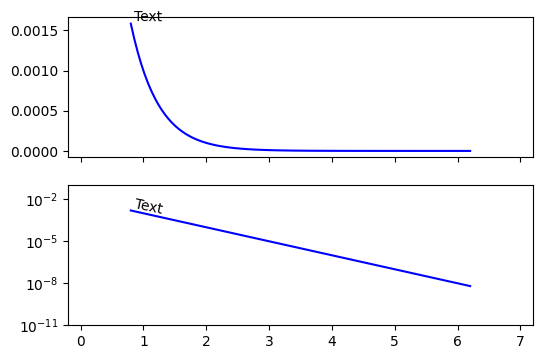

In [1]:
#rotation of labels
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 4), sharex=True)

ax2.set_yscale('log')
ax2.set(ylim=(1e-11, 1e-1), xlim=(-0.2, 7.2))

x = np.linspace(0.8, 6.2, 100)
y = (lambda x: 10**(( -2 - x)))(x)  

# angle in data coordinates
angle_data = np.rad2deg(np.arctan2(y[1]-y[0], x[1]-x[0]))

# Apply the exact same code to linear and log axes
for ax in (ax1, ax2):

    ax.plot(x, y, 'b-')

    # angle in screen coordinates
    angle_screen = ax.transData.transform_angles(np.array((angle_data,)), 
                                              np.array([x[0], y[0]]).reshape((1, 2)))[0]

    # using `annotate` allows to specify an offset in units of points
    ax.annotate("Text", xy=(x[0],y[0]), xytext=(2,2), textcoords="offset points", 
                rotation_mode='anchor', rotation=angle_screen)

plt.show()